# Classical Data Preprocessing and Conformal Transform

In this notebook, we accept 3D hits data from the TrackML dataset and treat using the Classical Hough Transform. The initial code of the notebook can be adapted to use with Quantum Hough Transform algorithm.

Note: Reqires installation of trackml-library. Can use the following in the Anaconda environment.

conda install git pip
pip install git+git://github.com/scrappy/scrappy@master

The following is the code for classical Hough Transform for single event.

In [87]:
# import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import os

from trackml.dataset import load_event, load_dataset
from trackml.utils import add_position_quantities, add_momentum_quantities, decode_particle_id
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
#%matplotlib inline

In [94]:
hits, cells, particles, truth = load_event('./trackmldataset/event000001000')
#print(hits)

def cartesian_to_cylindrical(x, y, z):
    
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    z = z
    return r, phi, z


def create_hough_matrix(hits):
    
    hough_matrix = hits[['hit_id', 'x', 'y', 'z']].copy()
    hough_matrix.columns = ['HitID', 'X', 'Y', 'Z']
    
    r, phi, z = cartesian_to_cylindrical(hough_matrix['X'].values, 
                                         hough_matrix['Y'].values, 
                                         hough_matrix['Z'].values)

    hough_matrix['R'] = r
    hough_matrix['Phi'] = phi
    
    # Pandas dataframe values to array
    trx1 = hough_matrix['R'].values
    try1 = hough_matrix['Phi'].values 
    trx2 = hough_matrix['X'].values
    try2 = hough_matrix['Y'].values 
    
    #plot to check mapping
    plt.scatter(hough_matrix['R'].values,hough_matrix['Phi'].values)
    #plt.scatter(trx1[0:10],try1[0:10])
    #plt.scatter([trx1[0],trx1[2],trx1[3],trx1[4],trx1[6],trx1[8],trx1[9]],
                #[try1[0],try1[2],try1[3],try1[4],try1[6],try1[8],try1[9]])
    plt.xlabel('R')
    plt.ylabel('Phi')
    plt.show()
    plt.scatter(hough_matrix['X'].values,hough_matrix['Y'].values)
    #plt.scatter(trx2[0:10],try2[0:10])
    #plt.scatter([trx2[0],trx2[2],trx2[3],trx2[4],trx2[6],trx2[8],trx2[9]],
                #[try2[0],try2[2],try2[3],try2[4],try2[6],try2[8],try2[9]])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    #return the hough matrix --- basically the hits matrix with Phi and R values appended.
    return hough_matrix

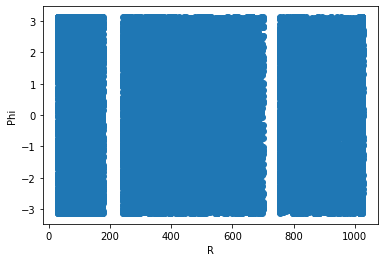

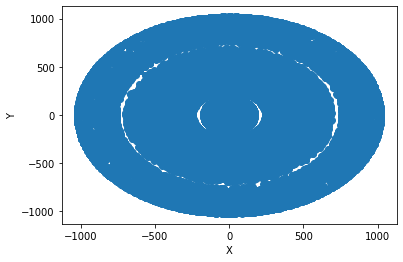

CPU times: user 3.94 s, sys: 49.9 ms, total: 3.99 s
Wall time: 1.31 s


In [95]:
%%time 
hits_updated = create_hough_matrix(hits)